In [1]:
import pandas as pd
import re
%matplotlib inline

In [2]:
page = str(1)
url = "http://formds.com/locales/washington-dc?page=%s"%page

In [3]:
def name_type_parse(df):
    type_par_list = []
    loc_list = []
    type_list = []
    for item in df['Company']:
        try:
            type_par = re.findall(r"\([^()]*\)",str(item))
            type_par_str = type_par[0]


            loc_f = re.findall(r"\-(.*)",type_par_str)
            loc_str = loc_f[0]


            type_f = re.findall(r"(.*)\-",type_par_str)
            type_str = type_f[0]

            type_list.append(type_str)
            loc_list.append(loc_str)
        except:
            type_list.append("Not Found")
            loc_list.append("Not Found")
        
    df['loc'] = loc_list
    df['type'] = type_list
    return(df)
    

In [67]:
def inc_cash_clean(df):
    inc_cash_list = []
    for item in df['Incremental Cash']:
        if item == 'Incremental Cash': item = '$0'
        item = item.replace("$", "")
        item = item.replace(",", "")
        inc_cash_list.append(float(item))
    df['Incremental Cash float'] = inc_cash_list
    
    return(df)

In [56]:
def rep_cash_clean(df):
    rep_cash_list = []
    for item in df['Reported funding']:
        item = item.replace("$", "")
        item = item.replace(",", "")
        try:
            if float(item) < 100000000:
                rep_cash_list.append(float(item))
            else:
                rep_cash_list.append(30000001)
        except:
            rep_cash_list.append(0)
    df['Reported funding float'] = rep_cash_list
    
    return(df)

In [25]:
def append_new_page(old_df,next_page):
    #old_df = old_df_as_list[0]
    url = "http://formds.com/locales/washington-dc?page=%s"%str(next_page)
    
    new_df_as_list = pd.read_html(url,header =None)
    new_df = new_df_as_list[0]
    
    out_df = old_df.append(new_df,ignore_index=True)
    
    return(out_df)

In [7]:
def date_to_year(df):
    year_list = []
    for item in df['Date']:
        year_month = re.match(r"(.*)\-",item)
        year = re.match(r"(.*)\-",year_month.group(1))
        year_str = year.group(1)
        year_list.append(year_str)
    df['Year'] = year_list
    return(df)

In [65]:
def df_column_clean(df):
    
    df_1 = inc_cash_clean(df)
    df_2 = rep_cash_clean(df_1)
    df_3 = name_type_parse(df_2)
    df_4 = date_to_year(df_3)
    
    
    df_final = df_4
    return(df_final)

In [69]:
data = pd.read_html(url,header =None)
old_df = data[0]

for i in range(2,20):

    #print(i)
    new_df = append_new_page(old_df,i)
    
    old_df = new_df

full_df = old_df
    
dt = full_df
dt = dt.drop(0)

In [70]:
dt.head()

,Company,New Filing?,Reported funding,Incremental Cash,Date,New or Amended
1,"FDS Nolensville Holdings, LLC (Commercial - A...",Yes,"$3,772,426","$3,772,426",2019-02-13,New Filing
2,PH Group Parent Corp. (Business Services - Ar...,Yes,"$18,729,702","$18,729,702",2019-02-13,New Filing
3,"Monsoon India Dynamic Alpha Fund, L.P. (Poole...",No,"$20,391,555","$4,816,355",2019-02-12,Amended
4,"Remine Inc. (Other Technology - Fairfax, VA)",Yes,"$29,683,058","$29,683,058",2019-02-12,New Filing
5,Nisos Holdings Inc. (Other Technology - Alexa...,Yes,"$6,100,000","$6,100,000",2019-02-12,New Filing


In [71]:

dtt =dt.copy()
dtt.keys()


Index(['Company', 'New Filing?', 'Reported funding', 'Incremental Cash',
       'Date', 'New or Amended'],
      dtype='object')

In [72]:
dtt.head()

,Company,New Filing?,Reported funding,Incremental Cash,Date,New or Amended
1,"FDS Nolensville Holdings, LLC (Commercial - A...",Yes,"$3,772,426","$3,772,426",2019-02-13,New Filing
2,PH Group Parent Corp. (Business Services - Ar...,Yes,"$18,729,702","$18,729,702",2019-02-13,New Filing
3,"Monsoon India Dynamic Alpha Fund, L.P. (Poole...",No,"$20,391,555","$4,816,355",2019-02-12,Amended
4,"Remine Inc. (Other Technology - Fairfax, VA)",Yes,"$29,683,058","$29,683,058",2019-02-12,New Filing
5,Nisos Holdings Inc. (Other Technology - Alexa...,Yes,"$6,100,000","$6,100,000",2019-02-12,New Filing


In [ ]:
dt.describe()

In [73]:
dfc = df_column_clean(dtt)


AttributeError: 'NoneType' object has no attribute 'group'

In [70]:
dttt.describe()

,Incremental Cash,Reported funding float
count,5.700000e+02,5.700000e+02
mean,4.708160e+07,9.155294e+06
std,3.026137e+08,1.219872e+07
min,0.000000e+00,0.000000e+00
25%,1.000000e+04,1.250000e+05
50%,9.187500e+05,1.738424e+06
75%,5.999988e+06,1.995402e+07
max,6.200000e+09,3.000000e+07


In [41]:
dttt.keys()

Index(['Company', 'New Filing?', 'Reported funding', 'Incremental Cash ',
       'Date', 'New or Amended', 'Incremental Cash', 'Reported funding float',
       'loc', 'type'],
      dtype='object')

In [77]:
dttt['type'].value_counts()

(Pooled Investment Fund                   250
(Other Technology                          89
(Other                                     46
(Commercial                                33
(REITS and Finance                         24
(Other Real Estate                         20
(Biotechnology                             15
(Restaurants                               12
(Other Banking and Financial Services      10
Not Found                                   9
(Other Health Care                          8
(Retailing                                  8
(Construction                               7
(Investing                                  6
(Other Energy                               5
(Insurance                                  5
(Oil and Gas                                4
(Pharmaceuticals                            4
(Manufacturing                              3
(Computers                                  3
(Telecommunications                         2
(Business Services                

In [ ]:
dates = []
for i in range(len(dttt)):
    dates.append(dttt['Date'][i])
dttt['date_str'] = dates

In [ ]:
dttt['Date'].hist()

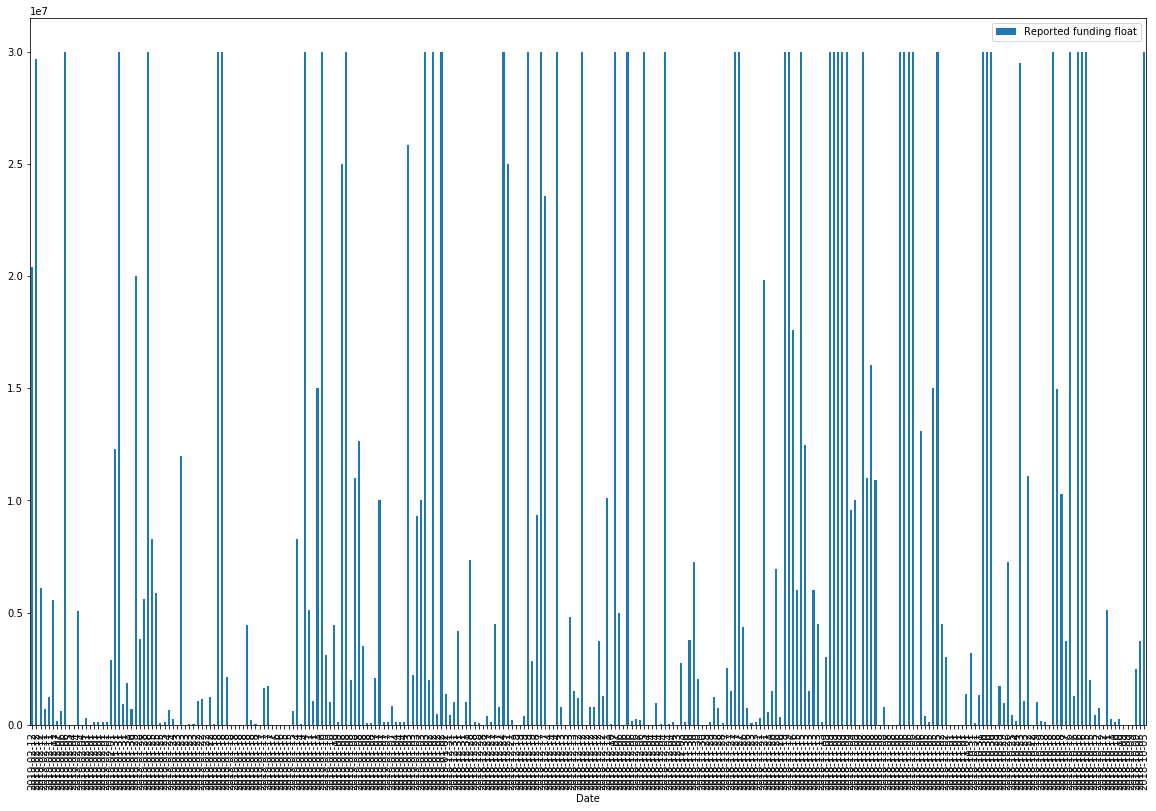

In [51]:
%matplotlib inline
dttt.plot(kind="bar",x="Date", y="Reported funding float",figsize=(20,13))

In [ ]:
1,000,000,000